In [1]:
# import the libray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('All library loaded')

All library loaded


In [2]:
data=pd.read_csv('https://gist.githubusercontent.com/RobotOptimist/cc82e87e7d2104e58711b7c846a9e220/raw/69ca02a46df0be8c210ebbded3106c5d9956a4bc/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
data.to_csv('salary_data.csv')

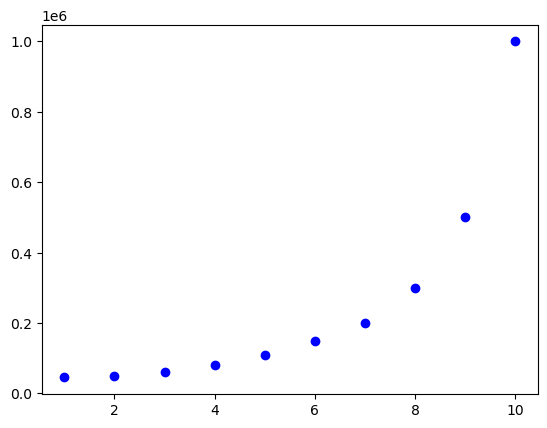

In [4]:
plt.scatter(data.Level, data.Salary, color='blue')

In [7]:
# Create indep var and dep var
X=data.iloc[:,1:2]
y=data.iloc[:,2]

In [8]:
X

,Level
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [28]:
# Apply Linear Regression algo
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
y_pred=lin_reg.predict(X)
y_pred

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

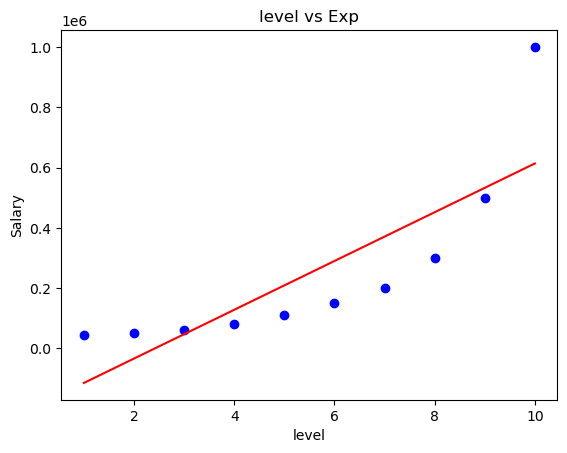

In [10]:
plt.scatter(X,y,color='b')
plt.plot(X,y_pred,color='r')
plt.title('level vs Exp')
plt.xlabel('level')
plt.ylabel('Salary')
plt.show()

In [35]:
# Apply polynomial Regression
# create poly features
from sklearn.preprocessing import PolynomialFeatures
poly_feat=PolynomialFeatures(degree=3)
X_poly=poly_feat.fit_transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [36]:
# Apply Linear reg
from sklearn.linear_model import LinearRegression
lin_reg_poly=LinearRegression()
lin_reg_poly.fit(X_poly,y)
y_pred=lin_reg_poly.predict(X_poly)
y_pred

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622377,
        83270.3962704 , 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846153])

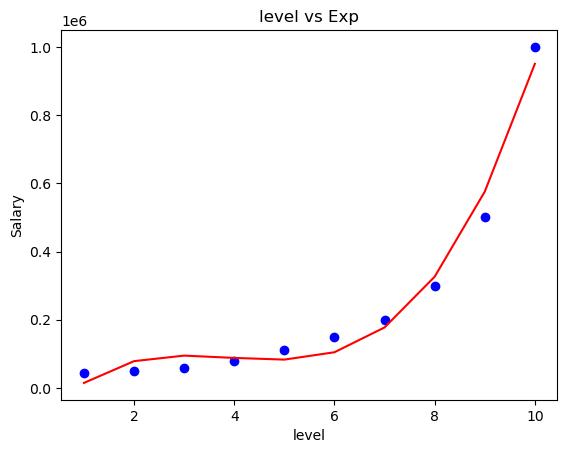

In [37]:
plt.scatter(X,y,color='b')
plt.plot(X,y_pred,color='r')
plt.title('level vs Exp')
plt.xlabel('level')
plt.ylabel('Salary')
plt.show()

In [38]:
# pred on new data
# level 5.5
lin_reg.predict([[5.5]])

C:\Users\er9po\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([249500.])

In [39]:
lin_reg_poly.predict(poly_feat.transform([[5.5]]))

C:\Users\er9po\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([89187.5])

In [40]:
poly_feat.transform([[4]])

C:\Users\er9po\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.,  4., 16., 64.]])

In [ ]:
# pros & cons

1. Capture non linear data
2. simple, flexible

# cons
1. Risk of overfit--real data---
2. degree -choose wise
3. Complexity